<a href="https://colab.research.google.com/github/JIESUN2718/Clinical_Data_Analysis/blob/main/Diabetic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
import numpy as np
import pandas as pd

# Visualization
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,recall_score,mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.metrics import precision_recall_fscore_support

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
!pip install catboost
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [14]:
df = pd.read_csv('/content/drive/MyDrive/Diabetic_Data_Mining/dataset_diabetes/diabetic_data.csv')

def display_all(data):
    with pd.option_context("display.max_row", 100, "display.max_columns", 100):
        display(data)
display_all(df.head())

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [11]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [12]:
#Checking for missing values in dataset
#In the dataset missing values are represented as '?' sign
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


In [18]:
df.readmitted = [1 if each=='<30' else 0 for each in df.readmitted]

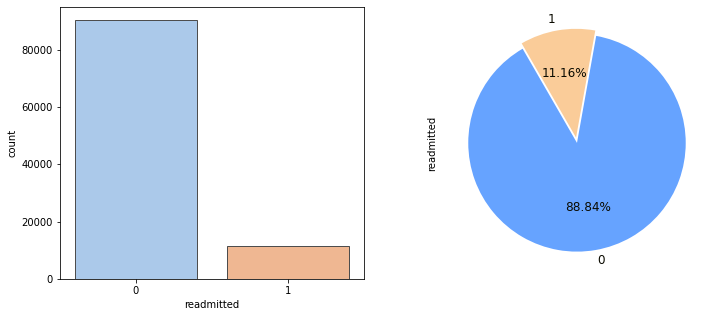

In [22]:
fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(12,5))
labels=['0','1']
sns.countplot(x=df.readmitted, data=df, palette="pastel",ax=ax[0], edgecolor=".3")
df.readmitted.value_counts().plot.pie(autopct="%1.2f%%", ax=ax[1], colors=['#66a3ff','#facc99'], 
                                        labels=labels, explode = (0, 0.05), startangle=120,
                                        textprops={'fontsize': 12, 'color':'#0a0a00'})
plt.show()

In [6]:

diabetic_label = origin_data['readmitted'].replace(['NO', '<30', '>30'], [0, 1, 0])
origin_data = origin_data.drop('readmitted', 1)
origin_data = origin_data.drop('encounter_id', 1)
origin_data = origin_data.drop('patient_nbr', 1)
category_variable = ['race', 'gender', 'weight', 'admission_type_id', 'discharge_disposition_id',
                      'admission_source_id', 'payer_code', 'medical_specialty ', 'diag_1', 'diag_2', 'diag_3',
                      'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
                      'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
                      'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide',
                      'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
                      'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']
numerical_variable = ['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
                      'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient',
                      'number_diagnoses', 'change ', 'diabetesMed']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


In [7]:
numerical_data = df()
numerical_data['age'] = origin_data['age'] \
        .replace(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
                  '[60-70)', '[70-80)', '[80-90)', '[90-100)'],
                 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
numerical_data['time_in_hospital'] = origin_data['time_in_hospital']
numerical_data['num_lab_procedures'] = origin_data['num_lab_procedures']
numerical_data['num_procedures'] = origin_data['num_procedures']
numerical_data['num_medications'] = origin_data['num_medications']
numerical_data['number_outpatient'] = origin_data['number_outpatient']
numerical_data['number_emergency'] = origin_data['number_emergency']
numerical_data['number_inpatient'] = origin_data['number_inpatient']
numerical_data['number_diagnoses'] = origin_data['number_diagnoses']
numerical_data['change'] = origin_data['change'].replace(['No', 'Ch'], [0, 1])
numerical_data['diabetesMed'] = origin_data['diabetesMed'].replace(['No', 'Yes'], [0, 1])

In [8]:
    # 处理类别变量
category_data = df()


for i in category_variable:
    count = 0
    number_dict = {}
    for j in origin_data[i]:
        if j not in number_dict:
            number_dict[j] = count
            count += 1
    category_data[i] = origin_data[i].replace(number_dict.keys(), number_dict.values())

min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit_transform(numerical_data)
save_path = '/content/drive/MyDrive/Diabetic_Data_Mining/dataset_diabetes/numerical_data.csv'
numerical_data.to_csv(save_path, index=False)

min_max_scaler.fit_transform(category_data)
save_path = '/content/drive/MyDrive/Diabetic_Data_Mining/dataset_diabetes/category_data.csv'
category_data.to_csv(save_path, index=False)

save_path = '/content/drive/MyDrive/Diabetic_Data_Mining/dataset_diabetes/diabetic_label.csv'
diabetic_label.to_csv(save_path, index=True)

IndentationError: ignored

In [ ]:

def common_process():
    origin_data = pd.read_csv('/content/drive/MyDrive/DIABETES_DATA.csv')
    common_data = df()
    common_data['RACE'] = origin_data['RACE']
    common_data['GENDER'] = origin_data['GENDER'].replace(['Female', 'Male'], [0, 1])
    common_data['AGE'] = origin_data['AGE'] \
        .replace(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
                  '[60-70)', '[70-80)', '[80-90)', '[90-100)'],
                 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    common_data['WEIGHT'] = origin_data['WEIGHT'].replace(['[0-25)', '[25-50)', '[50-75)', ''], [])
    common_data['ADMISSION_TYPE_ID'] = origin_data['ADMISSION_TYPE_ID']
    common_data['DISCHARGE_DISPOSITION_ID'] = origin_data['DISCHARGE_DISPOSITION_ID']
    common_data['ADMISSION_SOURCE_ID'] = origin_data['ADMISSION_SOURCE_ID']
    common_data['TIME_IN_HOSPITAL'] = origin_data['TIME_IN_HOSPITAL']
    common_data['NUM_LAB_PROCEDURES'] = origin_data['NUM_LAB_PROCEDURES']
    common_data['NUM_PROCEDURES'] = origin_data['NUM_PROCEDURES']
    common_data['NUM_MEDICATIONS'] = origin_data['NUM_MEDICATIONS']
    common_data['NUMBER_OUTPATIENT'] = origin_data['NUMBER_OUTPATIENT']
    common_data['NUMBER_EMERGENCY'] = origin_data['NUMBER_EMERGENCY']
    common_data['NUMBER_INPATIENT'] = origin_data['NUMBER_INPATIENT']
    common_data['DIAG_1'] = origin_data['DIAG_1']
    common_data['DIAG_2'] = origin_data['DIAG_2']
    common_data['DIAG_3'] = origin_data['DIAG_3']
    common_data['NUMBER_DIAGNOSES'] = origin_data['NUMBER_DIAGNOSES']
    common_data['MAX_GLU_SERUM'] = origin_data['MAX_GLU_SERUM'] \
        .replace(['None', 'Norm', '>200', '>300'], [0, 1, 2, 3])

    # common_data['RACE'] = origin_data['RACE'].replace(['NO', '<30', '>30'], [0, 1, 0])
    # common_data['RACE'] = origin_data['RACE'].replace(['NO', '<30', '>30'], [0, 1, 0])
    # common_data['RACE'] = origin_data['RACE'].replace(['NO', '<30', '>30'], [0, 1, 0])
    # common_data['RACE'] = origin_data['RACE'].replace(['NO', '<30', '>30'], [0, 1, 0])
    # common_data['RACE'] = origin_data['RACE'].replace(['NO', '<30', '>30'], [0, 1, 0])
    # common_data['RACE'] = origin_data['RACE'].replace(['NO', '<30', '>30'], [0, 1, 0])
    # common_data['RACE'] = origin_data['RACE'].replace(['NO', '<30', '>30'], [0, 1, 0])
    # common_data['RACE'] = origin_data['RACE'].replace(['NO', '<30', '>30'], [0, 1, 0])
    # common_data['RACE'] = origin_data['RACE'].replace(['NO', '<30', '>30'], [0, 1, 0])

    common_data['READMITTED'] = origin_data['READMITTED'].replace(['NO', '<30', '>30'], [0, 1, 0])
    save_path = '/content/drive/MyDrive/common_data.csv'
    common_data.to_csv(save_path, index=False)



In [ ]:


def word2number():
    origin_data = pd.read_csv('./origin_data/DIABETIC_DATA.csv')
    data_length = len(origin_data)
    origin_data['READMITTED'] = origin_data['READMITTED'].replace(['NO', '<30', '>30'], [0, 1, 0])
    origin_data = origin_data.drop('ENCOUNTER_ID', 1)
    origin_data = origin_data.drop('PATIENT_NBR', 1)
    for i in origin_data:
        count = 0
        number_dict = {}
        for j in origin_data[i]:
            if j not in number_dict:
                number_dict[j] = count
                count += 1
        origin_data[i] = origin_data[i].replace(number_dict.keys(), number_dict.values())
    train_y = origin_data['READMITTED'][0:int(data_length * 0.8)]
    test_y = origin_data['READMITTED'][int(data_length * 0.8):]
    origin_data = origin_data.drop('READMITTED', 1)
    train_x = origin_data[0:int(data_length * 0.8)]
    test_x = origin_data[int(data_length * 0.8):]
    return [train_x, train_y, test_x, test_y]

